In [1]:
import sys
sys.path.append("/home1/09528/sumbarger/simulation_analysis_tools/") 
import gizmo_analysis as gizmo 
import utilities as ut
#from fof_analysis import fof
import numpy as np
import pandas as pd
from matplotlib import pylab as plt
from matplotlib import rc #to use Latex math symbols like 'phi'
import matplotlib.colors as colors
import matplotlib.gridspec as gridspec
import seaborn as sns
from astropy.table import Table
from astropy.io import ascii
import pickle

In [2]:
b_parsec    = 4
b_kpc       = b_parsec / 1000.
ncut_min    = 5
age_cut_Myr = 3 #Myr
age_cut_Gyr = age_cut_Myr / 1000. #Gyr
softening   = 4. #res 7100
snaps = np.arange(621,624,1) #set snaps to an arrange of values, goes from 621 to but not including 624 going up by 1

simname     = 'm12m_res7100'
simdir      = '/scratch/projects/xsede/GalaxiesOnFIRE/metal_diffusion/m12m_r7100/1Myr'

In [3]:
print(snaps)
print(snaps[0])

[621 622 623]
621


In [4]:
part = gizmo.io.Read.read_snapshots(['star'],'index', snaps, simulation_directory=simdir, assign_hosts_rotation=True, assign_hosts=True)


# in utilities.simulation.Snapshot():
* reading:  scratch/projects/xsede/GalaxiesOnFIRE/metal_diffusion/m12m_r7100/1Myr/snapshot_times.txt

  using snapshot index = 621, redshift = 0.005


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  scratch/projects/xsede/GalaxiesOnFIRE/metal_diffusion/m12m_r7100/1Myr/output/snapdir_621/snapshot_621.0.hdf5
  snapshot contains the following number of particles:
    dark      (id = 1): 140876456 particles
    dark2     (id = 2): 10063684 particles
    gas       (id = 0): 116802873 particles
    star      (id = 4): 25283622 particles
    blackhole (id = 5): 0 particles

* reading the following
  species: ['star']

* reading particles from:
    snapshot_621.0.hdf5
    snapshot_621.1.hdf5
    snapshot_621.2.hdf5
    snapshot_621.3.hdf5
    snapshot_621.4.hdf5
    snapshot_621.5.hdf5
    snapshot_621.6.hdf5
    snapshot_621.7.hdf5

! cannot find MUSIC config file:  scratch/projects/xsede/GalaxiesOnFIRE/metal_diffusion/m12m_r7100/1Myr/*/*.co

In [5]:
pkl_path = '/home1/09528/sumbarger/GMC_project/Cloud_pickle_618-626'
filename = pkl_path + '/' + 'm12m_' + str(snaps[0]) + '_cluster.pkl'
with open(filename, 'rb') as handle: 
    cl_id = pickle.load(handle)
filename = pkl_path + '/' + 'm12m_' + str(snaps[1]) + '_cluster.pkl'
with open(filename, 'rb') as handle: 
    cl_id = pickle.load(handle)
filename = pkl_path + '/' + 'm12m_' + str(snaps[2]) + '_cluster.pkl'
with open(filename, 'rb') as handle: 
    cl_id = pickle.load(handle)

In [6]:
cloud_path = '/home1/09528/sumbarger/GMC_project/Cloud_1Myr618-626/'
data = ascii.read(cloud_path + 'cloud_props_m12m_1Myr622.txt')
idata = ascii.read(cloud_path + 'cloud_indices_m12m_1Myr622.txt')
data0 = ascii.read(cloud_path + 'cloud_props_m12m_1Myr621.txt')
idata0 = ascii.read(cloud_path + 'cloud_indices_m12m_1Myr621.txt')
data2 = ascii.read(cloud_path + 'cloud_props_m12m_1Myr623.txt')
idata2 = ascii.read(cloud_path + 'cloud_indices_m12m_1Myr623.txt')

In [7]:
print(data.keys())

['cloud number', 'xcm', 'ycm', 'zcm', 'mass', 'r_90', 'vdisp_x', 'vdisp_y', 'vdisp_z', 'alpha_vir', 'alpha_vir_s']


In [8]:
print(idata.keys())

['cloud number', 'index', 'id', 'x', 'y', 'z', 'mass', 'FeH', 'OxH', 'MfFe', 'MfOx']


In [9]:
MsunToGm = 1.99e33 #conversion from mass of sun to the mass of sun in grams
KpcToCm = 3.086e21 #conversion from kiloparsecs to centimeters
mp = 1.67e-24 #mass of a proton in mega grams
#bin_edge = 10.
bin_edge = 20. #to make the grid, it will be 20 kpc from the center in all directions
##gas properties to carry around

In [10]:
#creating empty lists to fill
xg = [] #x position of gas
yg = [] #y position of gas
zg = [] #z position of gas
vxg = [] #x velocity of gas
vyg = [] #y velocity of gas
vzg = [] #z velocity of gas
mg = [] #mass of gas
rhog = [] #density of gas
tg = [] #temperature of gas
idg = [] #id number of gas

xs = [] #x position of star
ys = [] #y position of star
zs = [] #z position of star
ms = [] #mass of the star
ids = [] #id number of star
    
#star properties to carry around

sxp = [] #star x position?
syp = [] #star y position?
szp = [] #star z position?
sxp_new = [] #new star x position?
syp_new = [] #new star y position?
szp_new = [] #new star z position?
sage = [] #age of the star

gxp = [] #gas x position?
gyp = [] #gas y position?
gzp = [] #gas z position?

vdispx = [] #standard deviation of vx
vdispy = [] #standard deviation of vy
vdispz = [] #standard deviation of vz

In [11]:
print(snaps)

[621 622 623]


In [12]:
sxcm = np.zeros(shape=(len(snaps),len(cl_id))) #empty array of star center of mass in x
sycm = np.zeros(shape=(len(snaps),len(cl_id))) #empty array of star center of mass in y
szcm = np.zeros(shape=(len(snaps),len(cl_id))) #empty array of star center of mass in z
ap_num = np.zeros(shape=(len(snaps),len(cl_id))) ###Ask Sam what this is

In [13]:
r_ap = 0.05 ###Ask Sam what this is

In [14]:
point_gas = [] ###Ask Sam what this is

In [15]:
tsnap = []

In [16]:
#part['star'].prop('host.distance.principal.cylindrical')[:,0] # the star radius from the center

In [17]:
for i in range(len(snaps)): #if i is in the range of the length of snaps
    #/home/smbeninc/scr/m12m/m12m_res7100/ #where it is located
    ################################################################################################# reads in snapshots
    #part = gizmo.io.Read.read_snapshots('all', 'snapshot_index', snaps[i],assign_host_principal_axes=True)
    #read the snapshot

    part = gizmo.io.Read.read_snapshots(['star', 'gas'],'index', snaps[i], simulation_directory=simdir, assign_hosts_rotation=True, assign_hosts=True)
    ################################################################################################# reads in snapshots
    
    tsnap.append(np.max(part['star'].prop('form.time'))) #add the max star form time to the snap times

    ig = np.where((part['gas'].prop('host.distance.principal.cylindrical')[:,0] <= bin_edge) & (np.fabs(part['gas'].prop('host.distance.principal.cartesian')[:,2]) <= 1.5) & (part['gas']['temperature'] <= 1e4))
    #get the indices where the gas cylindrical radius is less than or equal to the bin edge and 
    #the cartesian distance height is less than or equal to 1.5 and the gas temperature is less than 10000, cold
    #index gas
    
    ist = np.where((part['star'].prop('host.distance.principal.cylindrical')[:,0] <= bin_edge) & (np.fabs(part['star'].prop('host.distance.principal.cartesian')[:,2]) <= 1.5))
    #get the indices where the star cylindrical radius is less than or equal to the bin edge and
    #the cartesian distance is less than or equal to 1.5
    #can change the variable to is to be easier
    
    xg.append(part['gas'].prop('host.distance.principal.cartesian')[ig[0],0]) 
    #add the cartesian x coordinate of ig to the x values of the gas of the empty array
    yg.append(part['gas'].prop('host.distance.principal.cartesian')[ig[0],1])
    #add the cartesian y coordinate of ig to the y values of the gas
    zg.append(part['gas'].prop('host.distance.principal.cartesian')[ig[0],2])
    #add the cartesian z coordinate of ig to the z values of the gas
    
    vxg.append(part['gas'].prop('host.velocity.principal.cartesian')[ig[0],0])
    #add the x velocity of ig to the x velocity values of the gas of the empty array
    vyg.append(part['gas'].prop('host.velocity.principal.cartesian')[ig[0],1])
    #add the y velocity of ig to the y velocity values of the gas
    vzg.append(part['gas'].prop('host.velocity.principal.cartesian')[ig[0],2])
    #add the z velocity of ig to the z velocity values of the gas
    
    mg.append(part['gas']['mass'][ig])
    #add the mass of ig to the mass values of the gas
    rhog.append(part['gas'].prop('number.density')[ig])
    #add the number density of ig to the density values of the gas
    #take a look to see the density
    tg.append(part['gas']['temperature'][ig])
    #add the temperature of ig to the temperature values of the gas
    idg.append(part['gas']['id'][ig])
    #add the id of ig to the id values of the gas particle
    
    xs.append(part['star'].prop('host.distance.principal.cartesian')[ist[0],0])
    #add the cartesian x coordinate of ist to the x values of the stars
    ys.append(part['star'].prop('host.distance.principal.cartesian')[ist[0],1])
    #add the cartesian y coordinate of ist to the y values of the stars
    zs.append(part['star'].prop('host.distance.principal.cartesian')[ist[0],2])
    #add the cartesian z coordinate of ist to the z values of the stars
    ms.append(part['star']['mass'][ist])
    #add the mass of ist to the mass values of the stars
    ids.append(part['star']['id'][ist])
    #add the id of ist to the id values of the stars
    sage.append(part['star'].prop('age')[ist]*1000.) #converting age to Mega years instead of G Year
    #add the age of ist to the age values of the stars
        
    msh = np.array(ms[i])
    #assign variable msh to be the array of the mass of stars of i
    xsh = np.array(xs[i])
    #assign variable xsh to be the array of the x coordinates of the stars of i
    ysh = np.array(ys[i])
    #assign variable ysh to be the array of the y coordinates of the stars of i
    zsh = np.array(zs[i])
    #assign variable zsh to be the array of the z coordinates of the stars of i

    mgh = np.array(mg[i])
    #assign variable mgh to be the array of the mass of the gas of i
    xgh = np.array(xg[i])
    #assign variable xgh to be the array of the x coordinates of the gas of i
    ygh = np.array(yg[i])
    #assign variable ygh to be the array of the y coordinates of the gas of i
    zgh = np.array(zg[i])
    #assign variable zgh to be the array of the z coordinates of the gas of i

    vxgh = np.array(vxg[i])
    #assign variable vxgh to be the array of the x velocity of the gas of i
    vygh = np.array(vyg[i])
    #assign variable vygh to be the array of the y velocity of the gas of i
    vzgh = np.array(vzg[i])
    #assign variable vzgh to be the array of the z velocity of the gas of i
    
    for j in range(len(cl_id)):
        #when it is in the range of the length of the pickle file we opened
        cl = cl_id[j] #assign variable cl to be the points in the range of the pickle file m12m
        ind = [] #creating a list for indices that belong to a cloud
        check = [] #creating a list to look at the number of particles in each cloud
        print(j, ind, check) #print the j, ind, and check, an empty list
        for k in range(len(cl)): #making sure the actual id numbers match with id numbers
            #when it is in the range of the length of cl
            ind.append(np.where(cl[k] == ids[i])[0]) 
            #add the value of cl of k is equal to the first value of the id for stars to ind
            check.append(len(ind[k]))
            #add the length of ind of k to the check
        ind = np.array(ind, dtype=object)
        #set variable ind to be an array of ind
        ind2 = np.array(ind[np.where(np.array(check) == 1)[0]])
        #set variable ind2 to be an array where the array check is equal to 1 or if the check is true
        ind2 = ind2.astype(dtype='int') 
        #convert array ind2 to be a int type of array
        sxcm[i,j] = np.sum(msh[ind2]*xsh[ind2])/np.sum(msh[ind2])
        #sets up a variable as a math equation to get the star x position in centimeters
        sycm[i,j] = np.sum(msh[ind2]*ysh[ind2])/np.sum(msh[ind2])
        #sets up a variable as a math equation to get the star y position in centimeters
        szcm[i,j] = np.sum(msh[ind2]*zsh[ind2])/np.sum(msh[ind2])
        #sets up a variable as a math equation to get the star z position in centimeters
        sxp.append(xsh[ind2])
        #add the ind2 of the xsh to the star x position
        syp.append(ysh[ind2])
        #add the ind2 of the ysh to the star y position
        szp.append(zsh[ind2])
        #add the ind2 of the zsh to the star z position

        rh = np.sqrt((xgh-sxcm[i,j])**2 + (ygh-sycm[i,j])**2 + (zgh-szcm[i,j])**2)
        #calculate the radius/distance between gas and a star
        rsh = np.sqrt((xsh-sxcm[i,j])**2 + (ysh-sycm[i,j])**2 + (zsh-szcm[i,j])**2)
        #calculate the radius/distance of the stars
        ind = np.where(rh <= r_ap)
        #assigns variable ind to be the values where the density is less than r_ap
        n = float(len(ind[0]))
        #assigns variable n to be the floating points of the length of the first value of the array in ind
        indst = np.where((rsh <= r_ap) & (sage[i] <= float(i)*2.2))
        #assigns a variable where rsh is less than r_ap and the age is less than the floating points
        gxp.append(xgh[ind])
        #add the ind of the xgh to the gxp values
        gyp.append(ygh[ind])
        #add the ind of the ygh of the gyp values
        sxp_new.append(xsh[indst])
        #add the indst of the xsh to sxp_new
        syp_new.append(ysh[indst])
        #add the indst of the ysh to syp_new
        
        #appears to be a filter for "ind"
        if (len(ind[0]) > 0): #if statement if it is greater than 0
            vmean = np.average(vxgh[ind],weights=mgh[ind])
            #calculate the average and the weights
            vdispx.append(np.sqrt(np.sum(mgh[ind]*(vxgh[ind]-vmean)**2)/ ((n-1)*np.sum(mgh[ind])/n)))
            #add it to vdispx
            vmean = np.average(vygh[ind],weights=mgh[ind])
            #calculate the average and the weights
            vdispy.append(np.sqrt(np.sum(mgh[ind]*(vygh[ind]-vmean)**2)/ ((n-1)*np.sum(mgh[ind])/n)))
            #add it to vdispy
            vmean = np.average(vzgh[ind],weights=mgh[ind])
            #calculate the average and the weights
            vdispz.append(np.sqrt(np.sum(mgh[ind]*(vzgh[ind]-vmean)**2)/ ((n-1)*np.sum(mgh[ind])/n)))
            #add it to vdispz
        else: #if it is not greater than zero
            vdispx.append(0.) #add it to vdispx
            vdispy.append(0.) #add it to vdispy
            vdispz.append(0.) #add it to vdispz


# in utilities.simulation.Snapshot():
* reading:  scratch/projects/xsede/GalaxiesOnFIRE/metal_diffusion/m12m_r7100/1Myr/snapshot_times.txt

  using snapshot index = 621, redshift = 0.005


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  scratch/projects/xsede/GalaxiesOnFIRE/metal_diffusion/m12m_r7100/1Myr/output/snapdir_621/snapshot_621.0.hdf5
  snapshot contains the following number of particles:
    dark      (id = 1): 140876456 particles
    dark2     (id = 2): 10063684 particles
    gas       (id = 0): 116802873 particles
    star      (id = 4): 25283622 particles
    blackhole (id = 5): 0 particles

* reading the following
  species: ['star', 'gas']

* reading particles from:
    snapshot_621.0.hdf5
    snapshot_621.1.hdf5
    snapshot_621.2.hdf5
    snapshot_621.3.hdf5
    snapshot_621.4.hdf5
    snapshot_621.5.hdf5
    snapshot_621.6.hdf5
    snapshot_621.7.hdf5

! cannot find MUSIC config file:  scratch/projects/xsede/GalaxiesOnFIRE/metal_diffusion/m12m_r7100/1Myr

<ipython-input-17-e8f8c74bdfd5>:102: RuntimeWarning: invalid value encountered in double_scalars
  sxcm[i,j] = np.sum(msh[ind2]*xsh[ind2])/np.sum(msh[ind2])
<ipython-input-17-e8f8c74bdfd5>:104: RuntimeWarning: invalid value encountered in double_scalars
  sycm[i,j] = np.sum(msh[ind2]*ysh[ind2])/np.sum(msh[ind2])
<ipython-input-17-e8f8c74bdfd5>:106: RuntimeWarning: invalid value encountered in double_scalars
  szcm[i,j] = np.sum(msh[ind2]*zsh[ind2])/np.sum(msh[ind2])


2 [] []
3 [] []
4 [] []


<ipython-input-17-e8f8c74bdfd5>:138: RuntimeWarning: invalid value encountered in true_divide
  vdispx.append(np.sqrt(np.sum(mgh[ind]*(vxgh[ind]-vmean)**2)/ ((n-1)*np.sum(mgh[ind])/n)))
<ipython-input-17-e8f8c74bdfd5>:142: RuntimeWarning: divide by zero encountered in true_divide
  vdispy.append(np.sqrt(np.sum(mgh[ind]*(vygh[ind]-vmean)**2)/ ((n-1)*np.sum(mgh[ind])/n)))
<ipython-input-17-e8f8c74bdfd5>:146: RuntimeWarning: invalid value encountered in true_divide
  vdispz.append(np.sqrt(np.sum(mgh[ind]*(vzgh[ind]-vmean)**2)/ ((n-1)*np.sum(mgh[ind])/n)))


5 [] []
6 [] []
7 [] []
8 [] []
9 [] []
10 [] []
11 [] []
12 [] []
13 [] []
14 [] []
15 [] []
16 [] []
17 [] []

# in utilities.simulation.Snapshot():
* reading:  scratch/projects/xsede/GalaxiesOnFIRE/metal_diffusion/m12m_r7100/1Myr/snapshot_times.txt

  using snapshot index = 622, redshift = 0.005


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  scratch/projects/xsede/GalaxiesOnFIRE/metal_diffusion/m12m_r7100/1Myr/output/snapdir_622/snapshot_622.0.hdf5
  snapshot contains the following number of particles:
    dark      (id = 1): 140876456 particles
    dark2     (id = 2): 10063684 particles
    gas       (id = 0): 116800727 particles
    star      (id = 4): 25286033 particles
    blackhole (id = 5): 0 particles

* reading the following
  species: ['star', 'gas']

* reading particles from:
    snapshot_622.0.hdf5
    snapshot_622.1.hdf5
    snapshot_622.2.hdf5
    snapshot_622.3.hdf5
    snapshot_622.4.hdf5
    snapshot_622.5.hdf5
    snapshot_622.6.hdf5
    snapshot_622

<ipython-input-17-e8f8c74bdfd5>:142: RuntimeWarning: invalid value encountered in true_divide
  vdispy.append(np.sqrt(np.sum(mgh[ind]*(vygh[ind]-vmean)**2)/ ((n-1)*np.sum(mgh[ind])/n)))


5 [] []
6 [] []
7 [] []
8 [] []
9 [] []
10 [] []
11 [] []
12 [] []
13 [] []
14 [] []
15 [] []
16 [] []
17 [] []

# in utilities.simulation.Snapshot():
* reading:  scratch/projects/xsede/GalaxiesOnFIRE/metal_diffusion/m12m_r7100/1Myr/snapshot_times.txt

  using snapshot index = 623, redshift = 0.005


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  scratch/projects/xsede/GalaxiesOnFIRE/metal_diffusion/m12m_r7100/1Myr/output/snapdir_623/snapshot_623.0.hdf5
  snapshot contains the following number of particles:
    dark      (id = 1): 140876456 particles
    dark2     (id = 2): 10063684 particles
    gas       (id = 0): 116798615 particles
    star      (id = 4): 25288424 particles
    blackhole (id = 5): 0 particles

* reading the following
  species: ['star', 'gas']

* reading particles from:
    snapshot_623.0.hdf5
    snapshot_623.1.hdf5
    snapshot_623.2.hdf5
    snapshot_623.3.hdf5
    snapshot_623.4.hdf5
    snapshot_623.5.hdf5
    snapshot_623.6.hdf5
    snapshot_623

In [18]:
#focus_list = np.arange(1,2,1) #makes an arrange of numbers of 1 to 2 going up by 1
focus_list = np.arange(0,18,1)
print(focus_list)
focus = 0
print(len(cl_id))
print(len(cl_id[0]))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17]
18
12


In [19]:
alpha_track = np.zeros(shape=(3,len(cl_id))) #creates an array of zeros with the length of cl_id
alpha_s_track = np.zeros(shape=(3,len(cl_id))) #creates an array of zeros with the length of cl_id
vdisp_track = np.zeros(shape=(3,len(cl_id))) #creates an array of zeros with the length of cl_id
mass_track = np.zeros(shape=(3,len(cl_id))) #creates an array of zeros with the length of cl_id
xcm_track = np.zeros(shape=(3,len(cl_id))) #creates an array of zeros with the length of cl_id
ycm_track = np.zeros(shape=(3,len(cl_id))) #creates an array of zeros with the length of cl_id
zcm_track = np.zeros(shape=(3,len(cl_id))) #creates an array of zeros with the length of cl_id

print(xcm_track[0])
print(xcm_track[0][0])
print(sxcm[0])
print(sxcm[0][0])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0.0
[-14.2251525           nan          nan          nan  -2.72940558
          nan          nan          nan          nan          nan
          nan          nan          nan   4.25804238  -8.73390882
          nan -16.08838513          nan]
-14.225152498537028


In [20]:
for focus in focus_list:
    #focus on the ones in the focus_list
    #load in the cloud catalogs
    ##########find the original cloud
    xh = sxcm[0][focus] #set xh to be the focus of the first array of sxcm
    yh = sycm[0][focus] #set yh to be the focus of the first array of sycm
    zh = szcm[0][focus] #set zh to be the focus of the first array of szcm
    
    distx = np.array(data['xcm']) - xh 
    #set distx to be the array where xcm minus xh
    disty = np.array(data['ycm']) - yh
    #set disty to be the array where ycm minus yh
    distz = np.array(data['zcm']) - zh
    #set distz to be the array where zcm minus zh
    dist = np.sqrt(distx**2 + disty**2 + distz**2)
    #calculate the total distance
    focus_cl = np.where(dist == min(dist))[0]
    #set focus_cl to be where distance is the minimum
    focus_cl_m = data['mass'][np.where(data['cloud number'] == focus_cl)]
    #set focus_cl_m to be the mass where the the cloud number is equal to the focus cloud
    #cl is short for cloud
    
    cluster_gas = idata['id'][np.where(idata['cloud number'] == focus_cl)[0]]
    #set cluster_gas to the id where the cloud number is equal to the first number of the array focus_cl
    
    #use Andrew's particle tracking...eventually
    #find the original GMC
    ############################################ Backwards and Forwards tracking ### is the code you need
    backward = [] #use tracking
    for i in range(len(cluster_gas)):
        if (len(np.where(idata0['id'] == cluster_gas[i])[0]) == 2):
            #look at the number of items in the first row of cloud_props_m12m_590.txt and if it is row 2...
            dists = np.sqrt((idata0['x'][np.where(idata0['id'] == cluster_gas[i])[0]]-xh)**2 + (idata0['y'][np.where(idata0['id'] == cluster_gas[i])[0]]-yh)**2 + (idata0['z'][np.where(idata0['id'] == cluster_gas[i])[0]]-zh)**2) 
            #create an array that finds the changes between two snapshots
            
            ##print(idata0['id'][np.where(idata0['id'] == cluster_gas[i])[0][np.where(dists == np.min(dists))]])
            #the id of the clouds
            backward.append(idata0['cloud number'][np.where(idata0['id'] == cluster_gas[i])[0][np.where(dists == np.min(dists))]])
            #add the cloud number to backward tracking
            #print(idata0['x'][np.where(idata0['id'] == cluster_gas[i])[0][np.where(dists == np.min(dists))]])
            #print the data of the cluster gas
        if (len(np.where(idata0['id'] == cluster_gas[i])[0]) == 1):
            #if the length of id is equal to the cluster gas
            #print(idata0['x'][np.where(idata0['id'] == cluster_gas[i])[0]])
            #print the data
            backward.append(idata0['cloud number'][np.where(idata0['id'] == cluster_gas[i])[0]])
            #add it to the backward tracking
            
    #print('the backward is')
    #print(backward)
    #print('the median is')
    #print(np.median(backward))
    #print('does this work')
    ######## Added in to make it work
    median_value = np.median(backward)

    if np.isnan(median_value):
        # Handle the case when the median is NaN
        # For example, you can assign a default value or raise an error.
        # Here, I'm setting it to 0, but you can choose a suitable default value.
        original_cl = 0
    else:
        original_cl = int(median_value)
    #print(np.array(np.median(backward)))
    #original_cl = np.array(np.median(backward))
    #original_cl = np.int(original_cl)
    #original_cl = np.int(np.median(backward))
    #set the variable to the median of the backward tracking data
    
    #find out what happened to it
    xh = sxcm[2][focus] #look at the x value of the position
    yh = sycm[2][focus] #look at the y value of the position
    zh = szcm[2][focus] #look at the z value of the position

    evolve = [] #look at the evolution
    evolve_mass = [] #look at the mass of the evolution
    
    for i in range(len(cluster_gas)):
        #i in the range of the length of the cluster_gas
        
        ################# idata2 is for future ### is what you need
        if (len(np.where(idata2['id'] == cluster_gas[i])[0]) == 1):
            #look at the number of items in the first row of cloud_indices_m12m_592.txt and if it is row 1...
            
            evolve.append(idata2['cloud number'][np.where(idata2['id'] == cluster_gas[i])[0]])
            #add to the first column of "evolve" everything under the 'cloud number' column
            evolve_mass.append(np.float(idata2['mass'][np.where(idata2['id'] == cluster_gas[i])[0]]))
            #add to the first column of "evolve_mass" floating point values of everything under the column 'mass'
            
        if (len(np.where(idata2['id'] == cluster_gas[i])[0]) == 2):  
            #look at the number of items in the second row of cloud_indices_m12m_592.txt and if it is row 2...
            dists = np.sqrt((idata2['x'][np.where(idata2['id'] == cluster_gas[i])[0]]-xh)**2 + (idata2['y'][np.where(idata2['id'] == cluster_gas[i])[0]]-yh)**2 + (idata2['z'][np.where(idata2['id'] == cluster_gas[i])[0]]-zh)**2)
            #create an array that finds the changes between two snapshots 
            
            evolve.append(idata2['cloud number'][np.where(idata2['id'] == cluster_gas[i])[0][np.where(dists == np.min(dists))]])
            #add to the first column of "evolve" everything under the minimum distances in 'cloud number' column
            evolve_mass.append(np.float(idata2['mass'][np.where(idata2['id'] == cluster_gas[i])[0][np.where(dists == np.min(dists))]]))
            #add to the first column of "evolve_mass" everything under the minimum distances in 'cloud number' column

    #look at the whole cloud
        
    evolve = np.array(evolve)
    #turn evolve into an array
    evolve_mass = np.array(evolve_mass)
    #turn evolve_mass into an array
    unq = np.unique(evolve)
    #remove any duplicate values in 'evolve'
    unq_mass = np.zeros(len(unq))
    #make an array of zeros with dimension # of items in unq
    
    for i in range(len(unq)):
        #for every value in the range len(unq)
        k = np.where(evolve == unq[i])[0]
        #make array k where the first column contains all the the unique values of evolve
        unq_mass[i] = np.sum(evolve_mass[k])
        #set unqmass[i] to the added up values of all the items in evolve_mass

    if (len(unq_mass) > 0):
        #if the number of items in 'unq_mass' is less than 0...
        match = np.where(unq_mass == np.max(unq_mass))
        #give the condition "match" when the unique mass equal to the max mass
        evolve_cl = unq[match]
        #remove all the duplicate values from 'match' and put the unique values into evolve_cm
        evolve_cl_m = unq_mass[match][0]
        #set evolve_cl_m to the first element that is in the array of the unq_mass[match]
        evolve_cl_mtot = data['mass'][np.where(data['cloud number'] == evolve_cl)]
        ###evolve_cl_mtot = data2['mass'][np.where(data2['cloud number'] == evolve_cl)]
        #look into the 'mass' column of cloud_props_m12m_592.txt where the 'cloud number' match the evolve_cm numbers, tldr: look for all the matching cloud numbers
        ratio = evolve_cl_m/focus_cl_m
    else:
        ratio = 0.
        
    #mass_track[0,focus] = data['mass'][np.where(data['cloud number'] == focus_cl)]
    #alpha_track[0,focus] = data['alpha_vir'][np.where(data['cloud number'] == focus_cl)]
    #vdisp_track[0,focus] = np.sqrt(data['vdisp_x'][np.where(data['cloud number'] == focus_cl)]**2 + data['vdisp_y'][np.where(data['cloud number'] == focus_cl)]**2 + data['vdisp_z'][np.where(data['cloud number'] == focus_cl)]**2)/np.sqrt(3.)
    #xcm_track[0][focus] = data['xcm'][np.where(data['cloud number'] == focus_cl)]
    #ycm_track[0][focus] = data['ycm'][np.where(data['cloud number'] == focus_cl)]
    #zcm_track[0][focus] = data['zcm'][np.where(data['cloud number'] == focus_cl)]

    ############# Needed for multiple snapshots
    mass_track[0][focus] = data0['mass'][np.where(data0['cloud number'] == original_cl)]
    ###mass_track[1][focus] = data['mass'][np.where(data['cloud number'] == focus_cl)]
    alpha_track[0][focus] = data0['alpha_vir'][np.where(data0['cloud number'] == original_cl)]
    ###alpha_track[1][focus] = data['alpha_vir'][np.where(data['cloud number'] == focus_cl)]
    #alpha_s_track[0,focus] = data0['alpha_vir_s'][np.where(data0['cloud number'] == original_cl)]
    #alpha_s_track[1,focus] = data['alpha_vir_s'][np.where(data['cloud number'] == focus_cl)]
    vdisp_track[0][focus] = np.sqrt(data0['vdisp_x'][np.where(data0['cloud number'] == original_cl)]**2 + data0['vdisp_y'][np.where(data0['cloud number'] == original_cl)]**2 + data0['vdisp_z'][np.where(data0['cloud number'] == original_cl)]**2)/np.sqrt(3.)
    ###vdisp_track[1][focus] = np.sqrt(data['vdisp_x'][np.where(data['cloud number'] == focus_cl)]**2 + data['vdisp_y'][np.where(data['cloud number'] == focus_cl)]**2 + data['vdisp_z'][np.where(data['cloud number'] == focus_cl)]**2)/np.sqrt(3.)
    ###xcm_track[1][focus] = data['xcm'][np.where(data['cloud number'] == focus_cl)]
    ###ycm_track[1][focus] = data['ycm'][np.where(data['cloud number'] == focus_cl)]
    ###zcm_track[1][focus] = data['zcm'][np.where(data['cloud number'] == focus_cl)]
    xcm_track[0][focus] = data0['xcm'][np.where(data0['cloud number'] == original_cl)]
    ycm_track[0][focus] = data0['ycm'][np.where(data0['cloud number'] == original_cl)]
    zcm_track[0][focus] = data0['zcm'][np.where(data0['cloud number'] == original_cl)]
#the above code seems to be a series of checks for values within different rows in the data files and then assinging the true/false values to items in the listed arrays.
       
    ############ for multiple snapshots
    if ((ratio < 0.5) | (evolve_cl_m/evolve_cl_mtot < 0.5)):
        #if the ratio is less than .5 or the ratio between evolve_cl_m and evolve_cl_mtot is less than .5...
        print(focus,evolve_cl,np.float(ratio),"DEAD",np.float(evolve_cl_m/evolve_cl_mtot))
        #print all these variables
        alpha_track[2][focus] = 0.
        vdisp_track[2][focus] = 0.
        mass_track[2,focus] = 0.
        #set the second item under 'focus' to zero for all the arrays
        xcm_track[2][focus] = sxcm[2][focus]
        ycm_track[2][focus] = sycm[2][focus]
        zcm_track[2][focus] = szcm[2][focus]
        #set the second item under 'focus' to the second item under focus in the sxcm, sycm, and szcm arrays
    elif ((ratio >= 0.5) & (evolve_cl_m/evolve_cl_mtot >= 0.5)):
        print(focus, evolve_cl,np.float(ratio),'ALIVE')
        #print stuff
        mass_track[2][focus] = data2['mass'][np.where(data2['cloud number'] == evolve_cl)]
        #check if cloud number is evolve_cl then set mass_track[2,focus] to the true/false
        alpha_track[2][focus] = data2['alpha_vir'][np.where(data2['cloud number'] == evolve_cl)]
        #alpha_s_track[2,focus] = data2['alpha_vir_s'][np.where(data2['cloud number'] == evolve_cl)]
        vdisp_track[2][focus] = np.sqrt(data2['vdisp_x'][np.where(data2['cloud number'] == evolve_cl)]**2 + data2['vdisp_y'][np.where(data2['cloud number'] == evolve_cl)]**2 + data2['vdisp_z'][np.where(data2['cloud number'] == evolve_cl)]**2)/np.sqrt(3.)
        #calculate total velocity and then assign it to the positon in the array
        xcm_track[2][focus] = data2['xcm'][np.where(data2['cloud number'] == evolve_cl)]
        ycm_track[2][focus] = data2['ycm'][np.where(data2['cloud number'] == evolve_cl)]
        zcm_track[2][focus] = data2['zcm'][np.where(data2['cloud number'] == evolve_cl)]
        #more assigning true/false check to items in an array

<ipython-input-20-2b664fa08cff>:87: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  evolve_mass.append(np.float(idata2['mass'][np.where(idata2['id'] == cluster_gas[i])[0]]))
<ipython-input-20-2b664fa08cff>:171: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  print(focus, evolve_cl,np.float(ratio),'ALIVE')
<ipython-input-20-2b664fa08cff>:19: D

0 [3295] 1.0001112665275314 ALIVE
1 [3295] 0.0 DEAD 0.7041701636544333
2 [3295] 0.0 DEAD 0.7041701636544333
3 [3295] 0.0 DEAD 0.7041701636544333
4 [2636] 0.5119963458627462 ALIVE
5 [2636] 0.0 DEAD 0.9830368052478805
6 [2636] 0.0 DEAD 0.9830368052478805
7 [2636] 0.0 DEAD 0.9830368052478805
8 [2636] 0.0 DEAD 0.9830368052478805
9 [2636] 0.0 DEAD 0.9830368052478805
10 [2636] 0.0 DEAD 0.9830368052478805
11 [2636] 0.0 DEAD 0.9830368052478805
12 [2636] 0.0 DEAD 0.9830368052478805
13 [2406] 0.18658646978261334 DEAD 0.14970893265677926
14 [2141] 0.8966646431445973 DEAD 0.32683862229084065
15 [2141] 0.0 DEAD 0.32683862229084065
16 [2776] 0.7751490422730477 ALIVE
17 [2776] 0.0 DEAD 0.9598821926558019


In [21]:
#print(sxcm[:][17]) #print
#print(sycm[:][17]) #print
#print(szcm[:][17]) #print

In [22]:
#image some stuff
bin_edge = 0.5
sizebox = bin_edge*2.
stepn = 30 #no clue what this is for

count = 0
htot = 0.
w2d_kernel = []
nkernel = 200
w2d_table = np.zeros(nkernel+3)

vel_array0 = np.zeros(shape=(2,stepn, stepn)) #make empty arrays
vel_array1 = np.zeros(shape=(2,stepn, stepn)) #make empty arrays
vel_array2 = np.zeros(shape=(2,stepn, stepn)) #make empty arrays

In [23]:
#read the kernel file
kernelfile = '/home1/09528/sumbarger/GMC_project/kernel2d'
temp = open(kernelfile,'r').read().split('\n') #open kernel file and read

In [24]:
part.keys()

dict_keys(['star', 'gas'])

In [25]:
part['gas'].keys()

dict_keys(['acceleration', 'position', 'density', 'electron.fraction', 'temperature', 'mass', 'massfraction', 'hydrogen.neutral.fraction', 'id.child', 'id.generation', 'id', 'potential', 'size', 'sfr', 'velocity'])

In [26]:
print(part['gas'].prop('size'))

[690.634      580.23944      7.6926794  ...   0.9199033    0.89757377
   0.92873186]


In [27]:
for i in range(len(temp)-1): #in the range of temperature minus one
    if (i%2 == 0): #if i/2 is zero
        w2d_kernel = list(w2d_kernel)
        w2d_kernel.append(float(temp[i]))
        #add the temperature of i to the 'w2d_kernel'

w2d_kernel.append(0.) #add a zero floating point to 'w2d_kernel'
w2d_kernel = np.array(w2d_kernel) #make an array

stepnh= (stepn-1)/2 #value
res= sizebox/stepn #resolution
print('stepnh = ', stepnh) #print
print('res = ', res) #print

#focus = 38
focus = 0

for t in range(len(snaps)): #look at the snapshot
    w2darray = np.zeros(shape=(stepn, stepn)) #make an empty array with dimensions of stepn by stepn
    vel_array = np.zeros(shape=(stepn, stepn)) #make an empty array with dimensions of stepn by stepn
    xcen = xcm_track[t,focus] #set variable x center to the x position of the track with snapshot and focus
    ycen = ycm_track[t,focus] #set variable y center to the y position of the track with snapshot and focus
    zcen = zcm_track[t,focus] #set variable z center to the z position of the track with snapshot and focus
    
    #read in sim snap
    part = gizmo.io.Read.read_snapshots(['star','gas'],'index', snaps[t], simulation_directory=simdir, assign_hosts_rotation=True, assign_hosts=True)
    #part = gizmo.io.Read.read_snapshots('all', 'snapshot_index', snaps[t],assign_host_principal_axes=True)
    ################################################################################################# reads in snapshots
    
    ig = np.where((part['gas'].prop('host.distance.principal.cartesian')[:,0] <= (xcen + bin_edge)) & (part['gas'].prop('host.distance.principal.cartesian')[:,0] > (xcen - bin_edge)) &  (part['gas'].prop('host.distance.principal.cartesian')[:,1] > (ycen - bin_edge)) & (part['gas'].prop('host.distance.principal.cartesian')[:,1] <= (ycen + bin_edge)) & (np.fabs(part['gas'].prop('host.distance.principal.cartesian')[:,2]) <= 1.5))
    ngas = len(ig[0])
    
    ###ig = np.where((part['gas'].prop('host.distance.principal.cartesian')[:,0] <= (xcen + bin_edge)) & (part['gas'].prop('host.distance.principal.cartesian')[:,0] > (xcen - bin_edge)) &  (part['gas'].prop('host.distance.principal.cartesian')[:,1] > (ycen - bin_edge)) & (part['gas'].prop('host.distance.principal.cartesian')[:,1] <= (ycen + bin_edge)) & (np.fabs(part['gas'].prop('host.distance.principal.cartesian')[:,2]) <= 1.5))
    #take cartesian coordinate of gas distance difference and creating bounds
    ###ngas = len(ig[0]) #setting variable to the length of ig
    
    xg = part['gas'].prop('host.distance.principal.cartesian')[ig[0],0] #x cartesian coordinate of gas
    yg = part['gas'].prop('host.distance.principal.cartesian')[ig[0],1] #y cartesian coordinate of gas
    zg = part['gas'].prop('host.distance.principal.cartesian')[ig[0],2] #z cartesian coordinate of gas
    mg = part['gas']['mass'][ig] #mass of the gas
    hg = part['gas']['size'][ig] #assigning smooth lengh values of gas to hg
    
    #set the kernel weights, make sure to normalize properly
    for i in range(ngas):
        htot = htot + hg[i]/ngas
        
        
    ##big loop
    for i in range(ngas):
        #tells computer where to position data where it is visible
        xi = (xg[i]-xcen)/res+stepnh 
        yi = (yg[i]-ycen)/res+stepnh
        hi = 2*hg[i]/res
        
        ixmin= np.int(np.floor(xi-hi))+1
        if (ixmin < 0):
            ixmin=0
        if (ixmin > stepn-1):
            ixmin=stepn-1
        ixmax= np.int(np.floor(xi+hi))
        if (ixmax > stepn-1):
            ixmax=stepn-1
        if (ixmax < 0):
            ixmax=0
        iymin= np.int(np.floor(yi-hi))+1
        if (iymin < 0):
            iymin=0
        if (iymin > stepn-1):
            iymin=stepn-1
        iymax= np.int(np.floor(yi+hi))
        if (iymax > stepn-1):
            iymax=stepn-1
        if (iymax < 0):
            iymax=0
        #some imagining conditions    
        if (i%1000 == 0):
            print("Doing particle: ",i,ngas) #print
            
        count = count + 1
        w2d_sum = 0.
        d2max = 4.*hg[i]*hg[i]
        kernfrac = nkernel*.5/hg[i]
        loop = np.arange(ixmin,ixmax+1,1)
        for ii in range(len(loop)): #more organizing values to variables
            r0xx = (ii - stepnh)*res + xcen
            for jj in range(len(loop)):
                r0yy = (jj-stepnh)*res + ycen
                xx = xg[i] - r0xx
                yy = yg[i] - r0yy
                d2 = xx*xx + yy*yy
                if (d2 <= d2max):
                    d = np.sqrt(d2)
                    xii = d*kernfrac
                    xxi = np.int(np.floor(xii))
                    w2d= ((w2d_table[xxi+1] - w2d_table[xxi])*(xii - xxi)+ w2d_table[xxi])
                    w2darray[ii,jj] = w2d
                    w2d_sum = w2d_sum + w2d
                else:
                    w2darray[ii,jj] = 0.
        if (w2d_sum > 0):
            weight = mg[i]/w2dsum
            for ii in range(len(loop)):
                for jj in range(len(loop)):
                    if (w2darray[ii,jj] > 0):
                        vel_array[ii,jj] = vel_array[ii,jj] + w2darray[ii,jj]*weight
        else:
            ii = np.int(np.floor(xi + 0.5))
            jj = np.int(np.floor(yi + 0.5))
            if ((ii >=0) & (ii <= stepn-1) & (jj >= 0) & (jj <= stepn-1)):
                vel_array[ii,jj] = vel_array[ii,jj] + mg[i]

    if (t == 0):
        vel_array0[0,:,:] = vel_array
    if (t == 1):
        vel_array1[0,:,:] = vel_array
    if (t == 2):
        vel_array2[0,:,:] = vel_array

stepnh =  14.5
res =  0.03333333333333333

# in utilities.simulation.Snapshot():
* reading:  scratch/projects/xsede/GalaxiesOnFIRE/metal_diffusion/m12m_r7100/1Myr/snapshot_times.txt

  using snapshot index = 621, redshift = 0.005


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  scratch/projects/xsede/GalaxiesOnFIRE/metal_diffusion/m12m_r7100/1Myr/output/snapdir_621/snapshot_621.0.hdf5
  snapshot contains the following number of particles:
    dark      (id = 1): 140876456 particles
    dark2     (id = 2): 10063684 particles
    gas       (id = 0): 116802873 particles
    star      (id = 4): 25283622 particles
    blackhole (id = 5): 0 particles

* reading the following
  species: ['star', 'gas']

* reading particles from:
    snapshot_621.0.hdf5
    snapshot_621.1.hdf5
    snapshot_621.2.hdf5
    snapshot_621.3.hdf5
    snapshot_621.4.hdf5
    snapshot_621.5.hdf5
    snapshot_621.6.hdf5
    snapshot_621.7.hdf5

! cannot find MUSIC config file:  scratch/projects/xsede/Gala

<ipython-input-27-fdc70fbc8bf5>:55: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ixmin= np.int(np.floor(xi-hi))+1
<ipython-input-27-fdc70fbc8bf5>:60: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for m

Doing particle:  0 2509
Doing particle:  1000 2509
Doing particle:  2000 2509

# in utilities.simulation.Snapshot():
* reading:  scratch/projects/xsede/GalaxiesOnFIRE/metal_diffusion/m12m_r7100/1Myr/snapshot_times.txt

  using snapshot index = 622, redshift = 0.005


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  scratch/projects/xsede/GalaxiesOnFIRE/metal_diffusion/m12m_r7100/1Myr/output/snapdir_622/snapshot_622.0.hdf5
  snapshot contains the following number of particles:
    dark      (id = 1): 140876456 particles
    dark2     (id = 2): 10063684 particles
    gas       (id = 0): 116800727 particles
    star      (id = 4): 25286033 particles
    blackhole (id = 5): 0 particles

* reading the following
  species: ['star', 'gas']

* reading particles from:
    snapshot_622.0.hdf5
    snapshot_622.1.hdf5
    snapshot_622.2.hdf5
    snapshot_622.3.hdf5
    snapshot_622.4.hdf5
    snapshot_622.5.hdf5
    snapshot_622.6.hdf5
    snapshot_622.7.hdf5

! cannot find MUSIC confi

In [28]:
xs = []
ys = []
zs = []
ms = []
ids = []
    
#star properties to carry around

sxp = []
syp = []
szp = []
sxp_new = []
syp_new = []
szp_new = []

sage = []

for i in range(len(snaps)):
    ist = np.where((part['star'].prop('host.distance.principal.cylindrical')[:,0] <= bin_edge) & (np.fabs(part['star'].prop('host.distance.principal.cartesian')[:,2]) <= 1.5))
    
    
    xs.append(part['star'].prop('host.distance.principal.cartesian')[ist[0],0])
    ys.append(part['star'].prop('host.distance.principal.cartesian')[ist[0],1])
    zs.append(part['star'].prop('host.distance.principal.cartesian')[ist[0],2])
    ms.append(part['star']['mass'][ist])
    ids.append(part['star']['id'][ist])
    sage.append(part['star'].prop('age')[ist]*1000.)
        
    msh = np.array(ms[i])
    xsh = np.array(xs[i])
    ysh = np.array(ys[i])
    zsh = np.array(zs[i])
    
    for j in range(len(cl_id)):
        cl = cl_id[j]
        ind = []
        check = []
        #print(j, ind, check)
        for k in range(len(cl)):
            ind.append(np.where(cl[k] == ids[i])[0])
            check.append(len(ind[k]))
        ind = np.array(ind, dtype=object)
        ind2 = np.array(ind[np.where(np.array(check) == 1)[0]])
        ind2 = ind2.astype(dtype='int') 
        ###sxcm[i,j] = np.sum(msh[ind2]*xsh[ind2])/np.sum(msh[ind2])
        ###sycm[i,j] = np.sum(msh[ind2]*ysh[ind2])/np.sum(msh[ind2])
        ###szcm[i,j] = np.sum(msh[ind2]*zsh[ind2])/np.sum(msh[ind2])
        
        sxcm[i,j] = np.mean(xsh[ind2])
        sycm[i,j] = np.mean(ysh[ind2])
        szcm[i,j] = np.mean(zsh[ind2])
        
        sxp.append(xsh[ind2])
        syp.append(ysh[ind2])
        szp.append(zsh[ind2])

        rsh = np.sqrt((xsh-sxcm[i,j])**2 + (ysh-sycm[i,j])**2 + (zsh-szcm[i,j])**2)
        ind = np.where(rh <= r_ap)
        n = float(len(ind[0]))
        indst = np.where((rsh <= r_ap) & (sage[i] <= float(i)*2.2))

        sxp_new.append(xsh[indst])
        syp_new.append(ysh[indst])

In [29]:
test_id = cl_id[0] #these are the ids that belong to the very first cluster. There are 12 of them

part622 = gizmo.io.Read.read_snapshots(['star'],'index', 622, simulation_directory=simdir, assign_hosts_rotation=True, assign_hosts=True)
full_id622 = part622['star']['id']
sx622 = part622['star'].prop('host.distance.principal.cartesian')[:,0]
sy622 = part622['star'].prop('host.distance.principal.cartesian')[:,1]
sz622 = part622['star'].prop('host.distance.principal.cartesian')[:,2]

print(test_id)

test_index622 = [] #We are going to figure out where each id is in the full long list. We are going to put their locations in this list
for i in range(len(test_id)):
    keep622 = np.where(test_id[i] == full_id622)
    if len(keep622[0]) > 0:
        keep622 = keep622[0]
        #print(keep622)
        test_index622.append(keep622[0])
        
    else:
        print(test_id[i])
    
cl_sx622 = sx622[test_index622]
cl_sy622 = sy622[test_index622]
cl_sz622 = sz622[test_index622]
#for the snapshot 622, scatter plot of cl_sx622, cl_sy622


# in utilities.simulation.Snapshot():
* reading:  scratch/projects/xsede/GalaxiesOnFIRE/metal_diffusion/m12m_r7100/1Myr/snapshot_times.txt

  using snapshot index = 622, redshift = 0.005


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  scratch/projects/xsede/GalaxiesOnFIRE/metal_diffusion/m12m_r7100/1Myr/output/snapdir_622/snapshot_622.0.hdf5
  snapshot contains the following number of particles:
    dark      (id = 1): 140876456 particles
    dark2     (id = 2): 10063684 particles
    gas       (id = 0): 116800727 particles
    star      (id = 4): 25286033 particles
    blackhole (id = 5): 0 particles

* reading the following
  species: ['star']

* reading particles from:
    snapshot_622.0.hdf5
    snapshot_622.1.hdf5
    snapshot_622.2.hdf5
    snapshot_622.3.hdf5
    snapshot_622.4.hdf5
    snapshot_622.5.hdf5
    snapshot_622.6.hdf5
    snapshot_622.7.hdf5

! cannot find MUSIC config file:  scratch/projects/xsede/GalaxiesOnFIRE/metal_diffusion/m12m_r7100/1Myr/*/*.co

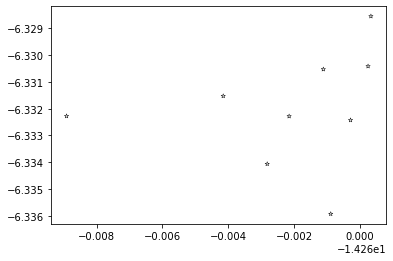

In [52]:
#ax1.scatter(sxp[len(cl_id)], syp[len(cl_id)], s=8,marker='*', edgecolors='k',facecolors='none',linewidth=0.5)
fig1, ax = plt.subplots() #sets up plot

plt.scatter(cl_sx622, cl_sy622, s=20, marker='*', edgecolors='k',facecolors='none',linewidth=0.5)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
plt.savefig('star_cluster_622.png')#,bbox_inches='tight') 
plt.savefig('star_cluster_622.pdf')
plt.show()

In [31]:
part623 = gizmo.io.Read.read_snapshots(['star'],'index', 623, simulation_directory=simdir, assign_hosts_rotation=True, assign_hosts=True)
full_id623 = part623['star']['id']
sx623 = part623['star'].prop('host.distance.principal.cartesian')[:,0]
sy623 = part623['star'].prop('host.distance.principal.cartesian')[:,1]
sz623 = part623['star'].prop('host.distance.principal.cartesian')[:,2]

test_index623 = [] #We are going to figure out where each id is in the full long list. We are going to put their locations in this list
for i in range(len(test_id)):
    keep = np.where(test_id[i] == full_id623)
    keep0 = keep[0]
    print(keep0)
    test_index623.append(keep0[0])
    
cl_sx623 = sx623[test_index623]
cl_sy623 = sy623[test_index623]
cl_sz623 = sz623[test_index623]
#for the snapshot 623, scatter plot of cl_sx623, cl_sy623


# in utilities.simulation.Snapshot():
* reading:  scratch/projects/xsede/GalaxiesOnFIRE/metal_diffusion/m12m_r7100/1Myr/snapshot_times.txt

  using snapshot index = 623, redshift = 0.005


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  scratch/projects/xsede/GalaxiesOnFIRE/metal_diffusion/m12m_r7100/1Myr/output/snapdir_623/snapshot_623.0.hdf5
  snapshot contains the following number of particles:
    dark      (id = 1): 140876456 particles
    dark2     (id = 2): 10063684 particles
    gas       (id = 0): 116798615 particles
    star      (id = 4): 25288424 particles
    blackhole (id = 5): 0 particles

* reading the following
  species: ['star']

* reading particles from:
    snapshot_623.0.hdf5
    snapshot_623.1.hdf5
    snapshot_623.2.hdf5
    snapshot_623.3.hdf5
    snapshot_623.4.hdf5
    snapshot_623.5.hdf5
    snapshot_623.6.hdf5
    snapshot_623.7.hdf5

! cannot find MUSIC config file:  scratch/projects/xsede/GalaxiesOnFIRE/metal_diffusion/m12m_r7100/1Myr/*/*.co

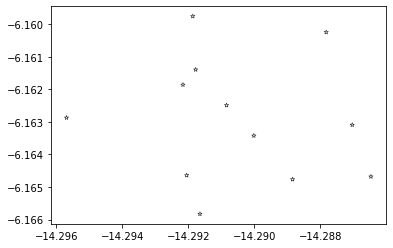

In [53]:
fig1, ax = plt.subplots() #sets up plot

plt.scatter(cl_sx623, cl_sy623, s=20, marker='*', edgecolors='k',facecolors='none',linewidth=0.5)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
plt.savefig('star_cluster_623.png')#,bbox_inches='tight') 
plt.savefig('star_cluster_623.pdf')
plt.show()

In [33]:
part621 = gizmo.io.Read.read_snapshots(['star'],'index', 621, simulation_directory=simdir, assign_hosts_rotation=True, assign_hosts=True)
full_id621 = part621['star']['id']
sx621 = part621['star'].prop('host.distance.principal.cartesian')[:,0]
sy621 = part621['star'].prop('host.distance.principal.cartesian')[:,1]
sz621 = part621['star'].prop('host.distance.principal.cartesian')[:,2]

test_index621 = [] #We are going to figure out where each id is in the full long list. We are going to put their locations in this list
for i in range(len(test_id)):
    keep621 = np.where(test_id[i] == full_id621)
    if len(keep621[0]) > 0:
        keep621 = keep621[0]
        #print(keep621)
        test_index621.append(keep621[0])
        
    else:
        print(test_id[i])
    
cl_sx621 = sx621[test_index621]
cl_sy621 = sy621[test_index621]
cl_sz621 = sz621[test_index621]
#for the snapshot 621, scatter plot of cl_sx621, cl_sy621


# in utilities.simulation.Snapshot():
* reading:  scratch/projects/xsede/GalaxiesOnFIRE/metal_diffusion/m12m_r7100/1Myr/snapshot_times.txt

  using snapshot index = 621, redshift = 0.005


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  scratch/projects/xsede/GalaxiesOnFIRE/metal_diffusion/m12m_r7100/1Myr/output/snapdir_621/snapshot_621.0.hdf5
  snapshot contains the following number of particles:
    dark      (id = 1): 140876456 particles
    dark2     (id = 2): 10063684 particles
    gas       (id = 0): 116802873 particles
    star      (id = 4): 25283622 particles
    blackhole (id = 5): 0 particles

* reading the following
  species: ['star']

* reading particles from:
    snapshot_621.0.hdf5
    snapshot_621.1.hdf5
    snapshot_621.2.hdf5
    snapshot_621.3.hdf5
    snapshot_621.4.hdf5
    snapshot_621.5.hdf5
    snapshot_621.6.hdf5
    snapshot_621.7.hdf5

! cannot find MUSIC config file:  scratch/projects/xsede/GalaxiesOnFIRE/metal_diffusion/m12m_r7100/1Myr/*/*.co

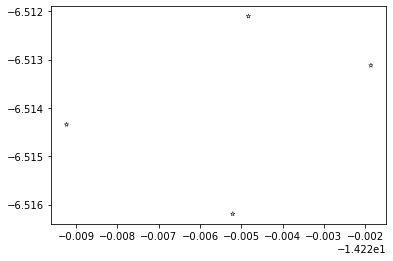

In [54]:
fig1, ax = plt.subplots() #sets up plot

plt.scatter(cl_sx621, cl_sy621, s=20, marker='*', edgecolors='k',facecolors='none',linewidth=0.5)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
plt.savefig('star_cluster_621.png')#,bbox_inches='tight') 
plt.savefig('star_cluster_621.pdf')
plt.show()

In [48]:
#we've loaded the very last snapshot 623 above
#we want to figure out which stars are the stars in the cluster we identified at 622
#we are only focusing on the very first cluster at the moment


test_id = cl_id[0] #these are the ids that belong to the very first cluster. There are 12 of them
#print(test_id)
full_id = part['star']['id'] #These are all the ids for all the stars in snapshot 623
test_index = [] #We are going to figure out where each id is in the full long list. We are going to put their locations in this list

for i in range(len(test_id)):
    keep = np.where(test_id[i] == full_id)
    keep0 = keep[0]
    #print(keep0)
    test_index.append(keep0[0])
    
sx        = part['star'].prop('host.distance.principal.cartesian')[:,0]
sy        = part['star'].prop('host.distance.principal.cartesian')[:,1]
sz        = part['star'].prop('host.distance.principal.cartesian')[:,2]

cl_sx = sx[test_index]
cl_sy = sy[test_index]
cl_sz = sz[test_index]

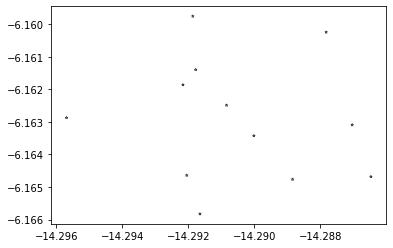

In [49]:
#ax1.scatter(sxp[len(cl_id)], syp[len(cl_id)], s=8,marker='*', edgecolors='k',facecolors='none',linewidth=0.5)
plt.scatter(cl_sx, cl_sy, s=8, marker='*', edgecolors='k',facecolors='none',linewidth=0.5)

<ipython-input-57-715279a39a34>:30: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  ax1.imshow(vel_array1[0,:,:]/((res*1000.)**2), interpolation='gaussian',norm=colors.LogNorm(),vmin=1,vmax=1000,extent=(xcm_track[1,1]-0.5,xcm_track[1,1]+0.5,ycm_track[1,1]-0.5,ycm_track[1,1]+0.5))
<ipython-input-57-715279a39a34>:31: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  ax2.imshow(vel_array2[0,:,:]/((res*1000.)**2), interpolation='gaussian',norm=colors.LogNorm(),vmin=1,vmax=1000,extent=(xcm_track[2,1]-0.5,xcm_track[2,1]+0.5,ycm_track[2,1]-0.5,ycm_track[2,1]+0.5))


<Figure size 432x288 with 0 Axes>

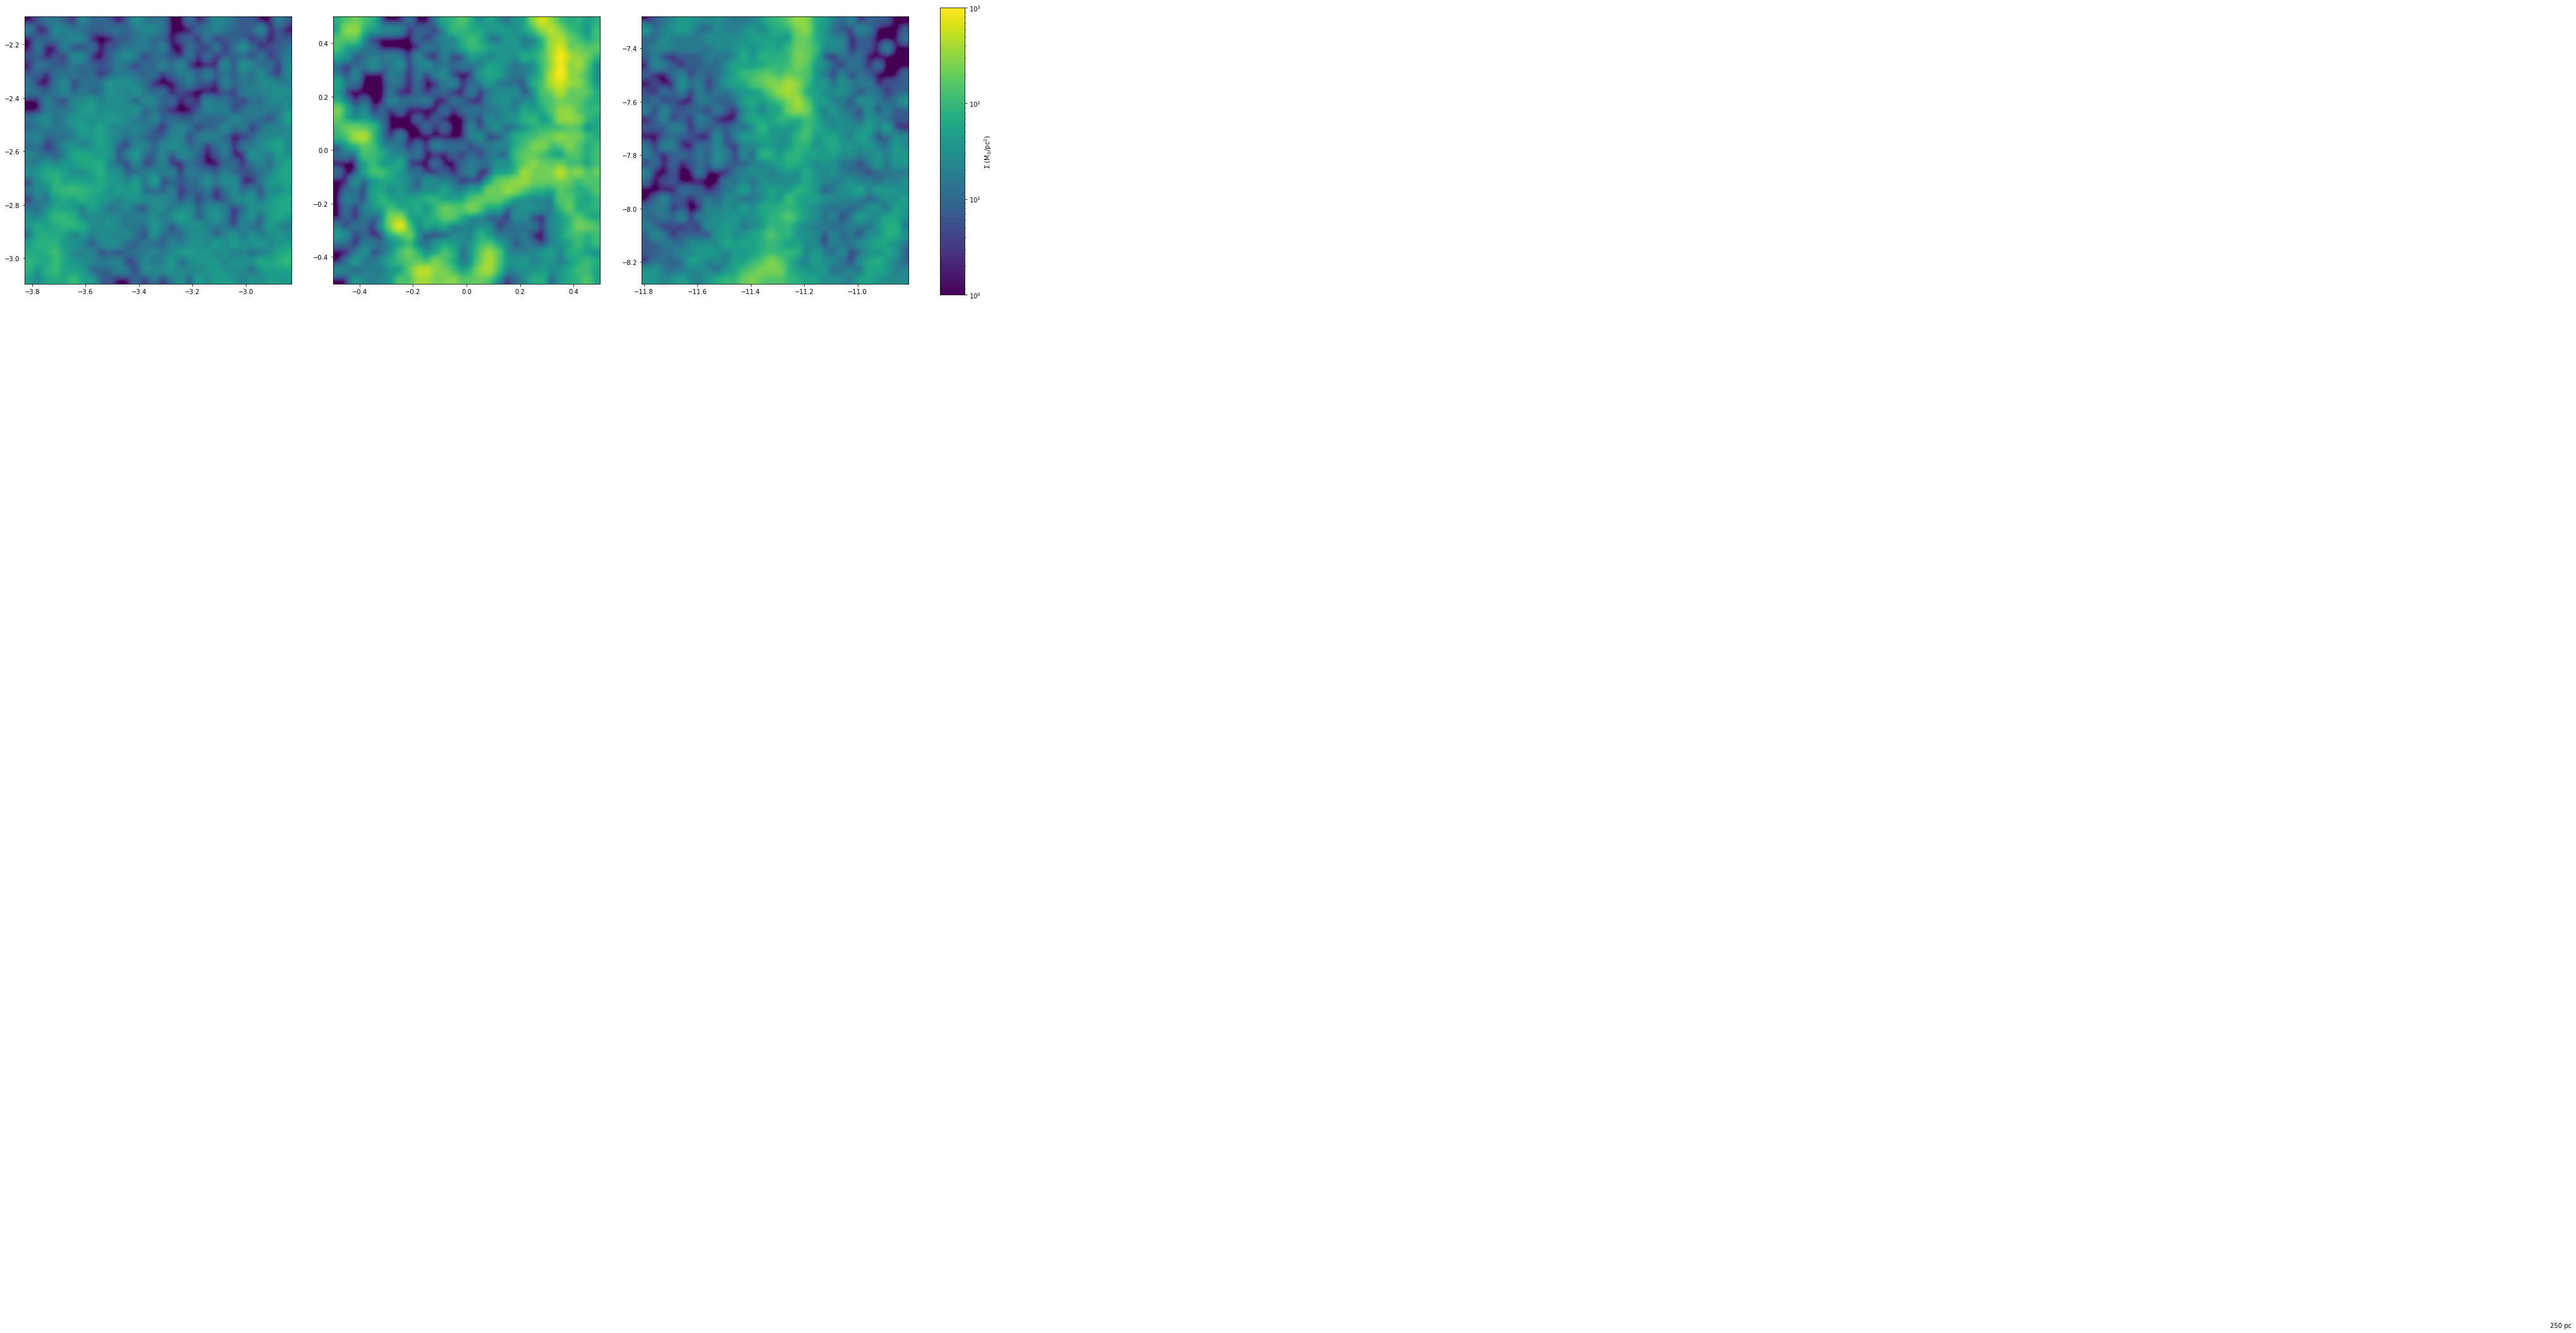

In [57]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

plt.clf()
fig = plt.figure()
fig.set_size_inches(27,9)

#fig = plt.figure(figsize=(10*3,4*3)) #sets up figure
#fig.suptitle('Star Clusters in the GMC') #title the plot

#height and width of plots
#fig.set_figheight(30)
#fig.set_figwidth(90)

gs0 = gridspec.GridSpec(1, 4, width_ratios=[1,1,1,.1]) #sets up grid
#gs00 = gridspec.GridSpecFromSubplotSpec(1, 3, subplot_spec=gs0[0],wspace=0.05)
#gs01 = gridspec.GridSpecFromSubplotSpec(1, 3, subplot_spec=gs0[1],wspace=0.05)

#sets up plots
ax0 = plt.subplot(gs0[0])
ax1 = plt.subplot(gs0[1])
ax2 = plt.subplot(gs0[2])
#axcb = plt.subplot(gs0[3])

# Pass vmin and vmax directly to LogNorm
norm1 = LogNorm(vmin=1, vmax=1000)

#displays plots
ax0.imshow(vel_array0[0,:,:]/((res*1000.)**2), interpolation='gaussian',norm=norm1, extent=(xcm_track[0, 1] - 0.5, xcm_track[0, 1] + 0.5, ycm_track[0, 1] - 0.5, ycm_track[0, 1] + 0.5))
ax1.imshow(vel_array1[0,:,:]/((res*1000.)**2), interpolation='gaussian',norm=colors.LogNorm(),vmin=1,vmax=1000,extent=(xcm_track[1,1]-0.5,xcm_track[1,1]+0.5,ycm_track[1,1]-0.5,ycm_track[1,1]+0.5))
ax2.imshow(vel_array2[0,:,:]/((res*1000.)**2), interpolation='gaussian',norm=colors.LogNorm(),vmin=1,vmax=1000,extent=(xcm_track[2,1]-0.5,xcm_track[2,1]+0.5,ycm_track[2,1]-0.5,ycm_track[2,1]+0.5))

#ax0.plot([5.65,5.65+0.25],[-7.05,-7.05],color='k',linewidth=1.5)
ax0.text(5.625,-7,'250 pc')

#last_index = len(cl_id) - 1
#ax0.scatter(sxp[last_index], syp[last_index], s=8, marker='*', edgecolors='k', facecolors='none', linewidth=0.5)

#plot the stars

#ax1.scatter((np.mean(cl_sx622) - cl_sx622), (np.mean(cl_sy622) - cl_sy622), s=120, marker='*', edgecolors='r',facecolors='none',linewidth=0.5)

#ax1.scatter(sxp[len(cl_id)], syp[len(cl_id)], s=8,marker='*', edgecolors='k',facecolors='none',linewidth=0.5)
#ax1.scatter(sxp[1+len(cl_id)], syp[1+len(cl_id)], s=8,marker='*', edgecolors='k',facecolors='none',linewidth=0.5)
#ax1.scatter(sxp[37+len(cl_id)], syp[37+len(cl_id)], s=8,marker='*',edgecolors='k',facecolors='none',linewidth=0.5)
#ax1.scatter(sxp[54+len(cl_id)], syp[54+len(cl_id)], s=8,marker='*', edgecolors='k',facecolors='none',linewidth=0.5)
#ax1.scatter(sxp[73+len(cl_id)], syp[73+len(cl_id)], s=8,marker='*', edgecolors='k',facecolors='none',linewidth=0.5)

#ax2.scatter(cl_sx623, cl_sy623, s=120, marker='*', edgecolors='r',facecolors='none',linewidth=0.5)

#ax2.scatter(sxp[2*len(cl_id)], syp[2*len(cl_id)], s=8,marker='*', edgecolors='k',facecolors='none',linewidth=0.5)
#ax2.scatter(sxp[1+2*len(cl_id)], syp[1+2*len(cl_id)], s=8,marker='*', edgecolors='k',facecolors='none',linewidth=0.5)
#ax2.scatter(sxp[37+2*len(cl_id)], syp[37+2*len(cl_id)], s=8,marker='*', edgecolors='k',facecolors='none',linewidth=0.5)
#ax2.scatter(sxp[54+2*len(cl_id)], syp[54+2*len(cl_id)], s=8,marker='*', edgecolors='k',facecolors='none',linewidth=0.5)
#ax2.scatter(sxp[73+2*len(cl_id)], syp[73+2*len(cl_id)], s=8,marker='*', edgecolors='k',facecolors='none',linewidth=0.5)



#more plotting
#ax11.scatter(sxcm[1,1],sycm[1,1],marker='o',s=80,edgecolors='k',facecolors='none',linewidth=0.75)
#ax11.scatter(sxcm[1,37],sycm[1,37],marker='o',s=80,edgecolors='k',facecolors='none',linewidth=0.75)
#ax11.scatter(sxcm[1,54],sycm[1,54],marker='o',s=80,edgecolors='k',facecolors='none',linewidth=0.75)
#ax11.scatter(sxcm[1,73],sycm[1,73],marker='o',s=80,edgecolors='k',facecolors='none',linewidth=0.75)

#ax12.scatter(sxcm[2,1],sycm[2,1],marker='o',s=80,edgecolors='k',facecolors='none',linewidth=0.75)
#ax12.scatter(sxcm[2,37],sycm[2,37],marker='o',s=80,edgecolors='k',facecolors='none',linewidth=0.75)
#ax12.scatter(sxcm[2,54],sycm[2,54],marker='o',s=80,edgecolors='k',facecolors='none',linewidth=0.75)
#ax12.scatter(sxcm[2,73],sycm[2,73],marker='o',s=80,edgecolors='k',facecolors='none',linewidth=0.75)

#removing visibility
#ax0.get_xaxis().set_visible(False)
#ax0.get_yaxis().set_visible(False)
#ax1.get_xaxis().set_visible(False)
#ax1.get_yaxis().set_visible(False)
#ax2.get_xaxis().set_visible(False)
#ax2.get_yaxis().set_visible(False)

#assigning colors and labels
norm1 = colors.LogNorm(vmin=1,vmax=1000)
#cb = plt.colorbar.ColorbarBase(axcb, norm=norm1)
#cb = fig.colorbar(norm=norm1, cax=axcb)
#cb.set_label('$\Sigma$ (M$_{\odot}$/pc$^2$)')
#fig.colorbar(norm=norm1, cax=axcb, label=('$\Sigma$ (M$_{\odot}$/pc$^2$)')

cax = fig.add_axes([0.87, 0.15, 0.02, 0.7])  # [left, bottom, width, height]
norm1 = colors.LogNorm(vmin=1, vmax=1000)
fig.colorbar(plt.cm.ScalarMappable(norm=norm1, cmap=plt.cm.viridis), cax=cax, label=r'$\Sigma$ (M$_{\odot}$/pc$^2$)')

#creating labels
#ax0.set_title('Snapshot 621')
#ax1.set_title('Snapshot 622')
#ax2.set_title('Snapshot 623')
#ax0.set_xlabel('X (parsecs)')
#ax0.set_ylabel('Y (parsecs)')
#ax1.set_xlabel('X (parsecs)')
#ax1.set_ylabel('Y (parsecs)')
#ax2.set_xlabel('X (parsecs)')
#ax2.set_ylabel('Y (parsecs)')

#saving plot

plt.savefig('gmc.png')#,bbox_inches='tight') 
plt.savefig('gmc.pdf')

#display plot
display = plt.show() #show plot

#plt.close(fig)